In [1]:
!pip3 install xgboost

In [74]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [58]:
data_frame = pd.read_csv("water_potability.csv")

In [59]:
data_frame.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [60]:
data_labels = data_frame["Potability"]

In [61]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']
data = data_frame[features]

x_train , x_test , y_train , y_test = train_test_split( data , data_labels , test_size = 0.3 )

In [62]:
x_train.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1188,7.727421,227.842720,18767.941635,9.716908,NaN,328.854169,8.233405,66.678214,4.601802
1026,7.159398,171.816105,28954.801012,5.817090,357.328759,530.526411,18.117042,79.094440,3.254926
2470,9.106917,209.609618,16879.524770,2.102691,NaN,294.310081,8.064296,70.190625,4.186726
2411,7.519227,210.384790,16897.307041,6.568658,344.703673,315.520435,19.856184,NaN,3.275725
2194,8.028304,204.783735,20408.485598,4.531581,406.328921,515.575097,21.558863,70.547218,3.915991


In [63]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [64]:
x_train.isnull().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
dtype: bool

In [66]:
x_train.ph.fillna(value = x_train.ph.mean() , inplace = True)
x_train.Sulfate.fillna(value = x_train.Sulfate.mean() , inplace = True)
x_train.Trihalomethanes.fillna(value = x_train.Trihalomethanes.mean() , inplace = True)

In [67]:
x_test.ph.fillna(value = x_test.ph.mean() , inplace = True)
x_test.Sulfate.fillna(value = x_test.Sulfate.mean() , inplace = True)
x_test.Trihalomethanes.fillna(value = x_test.Trihalomethanes.mean() , inplace = True)

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2293, 9)
(983, 9)
(2293,)
(983,)


In [70]:
x_train.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1188,7.727421,227.842720,18767.941635,9.716908,334.150183,328.854169,8.233405,66.678214,4.601802
1026,7.159398,171.816105,28954.801012,5.817090,357.328759,530.526411,18.117042,79.094440,3.254926
2470,9.106917,209.609618,16879.524770,2.102691,334.150183,294.310081,8.064296,70.190625,4.186726
2411,7.519227,210.384790,16897.307041,6.568658,344.703673,315.520435,19.856184,66.281188,3.275725
2194,8.028304,204.783735,20408.485598,4.531581,406.328921,515.575097,21.558863,70.547218,3.915991


In [71]:
x_train.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [72]:
x_test.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [73]:
#### now training my gbdt model on my training data

params = { "max_depth" : [ 2,3,4 ] , "n_estimators" : [ 50 , 100 , 150 ]}
estimator = GradientBoostingClassifier()
model = GridSearchCV(estimator , param_grid = params)
model.fit(x_train , y_train)


model.best_params_

{'max_depth': 4, 'n_estimators': 150}

accuracy is 0.671414038657172


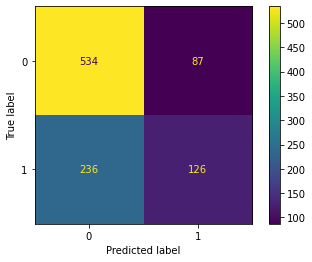

In [82]:
estimator = GradientBoostingClassifier(max_depth = 4, n_estimators = 150)
estimator.fit(x_train , y_train)
predicted = estimator.predict(x_test)

accuracy = accuracy_score(y_test , predicted)

print("accuracy is {}".format(accuracy))
plot_confusion_matrix(estimator , x_test , y_test)

In [83]:
#### accuracy is 67%